# About 

This notebook explores visualization of the training process / model for the huggingface finetuned transformer. 

## Setup 

In [5]:
# Download libraries for environment. 

import sys 
import os 

# Env. vars to check if the notebook is running on colab, kaggle etc. 
IS_COLAB = "google.colab" in sys.modules 
IS_KAGGLE = "kaggle_secrets" in sys.modules 
IS_LOCAL = not (IS_COLAB or IS_KAGGLE)

if IS_COLAB:
    # Install the packages 
    %pip install -q -U tensorflow-addons
    %pip install -q -U transformers
    %pip install -q -U datasets
    print("You can safely ignore the package incompatibility errors.")
    # Mount the drive 
    from google.colab import drive 
    drive.mount("/drive")

In [6]:

import os
import pandas as pd
import numpy as np
from tqdm import tqdm 

import random 
import shutil 
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"


# Pytorch imports 
import torch
import torch.nn as nn 
from torch.utils.data import Dataset, DataLoader

# Others 
import glob 

# Transformers 
import transformers 
from transformers import TextDataset,DataCollatorForLanguageModeling
from transformers import Trainer, TrainingArguments,AutoModelWithLMHead
from transformers import AutoTokenizer
import datasets 

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)



In [7]:
# --  Set environment global vars. 

# Shared env. vars. 
GLOBAL_SEED = 42 
IS_CUDA_ENV = torch.cuda.is_available()
GLOBAL_DEVICE = torch.device('cuda') if IS_CUDA_ENV else torch.device('cpu')
SET_SEED = True # If true, sets the global seeds for this notebook. 

if IS_LOCAL:
    LIMITED_RESOURCES = not IS_CUDA_ENV
    SMALL_DATASET_SIZE = 500

if IS_COLAB:
    LIMITED_RESOURCES = False 

In [8]:
# Configuring env. 
if SET_SEED:
    # to make this notebook's output stable across runs
    np.random.seed(GLOBAL_SEED) 
    torch.manual_seed(GLOBAL_SEED)

In [9]:
# Project Paths
NOTEBOOK_NAME = "6.0-MU-GPT-Finetune-Visualization-POC"
PROJECT_ROOT_DIR = "/Users/muhammadumair/Documents/Repositories/mumair01-repos/GPT-Monologue-to-Dialogue" 
# --- Input data dirs. 
DATASET_NAME = "ICC/julia_dissertation"
DATASET_TYPE = "csv"
PROCESSED_DATA_DIR = os.path.join(PROJECT_ROOT_DIR,"datasets","data", "processed", DATASET_NAME)

# --- Result dirs. 
REPORTS_DIR = os.path.join(PROJECT_ROOT_DIR,"data","reports",NOTEBOOK_NAME)

PROCESSED_DATA_DIR


'/Users/muhammadumair/Documents/Repositories/mumair01-repos/GPT-Monologue-to-Dialogue/datasets/data/processed/ICC/julia_dissertation'

In [11]:
# Paths specific to the models trained using Trainer. 
LOAD_MODEL_DIR = os.path.join(PROJECT_ROOT_DIR,"data","models","5.0-MU-GPT-Finetune-CustomDataset-POC")


## Visualization 

### Training visualization 

In [12]:
CHECKPOINT_NAME = "checkpoint-1218"
TRAINER_STATE_PATH = os.path.join(LOAD_MODEL_DIR,CHECKPOINT_NAME,"trainer_state.json")
assert os.path.isfile(TRAINER_STATE_PATH)

In [13]:
import json 

In [14]:
with open(TRAINER_STATE_PATH,"r") as f:
    data = json.load(f)
    log_history = data["log_history"]
    # Separate the training and evaluation losses 
    train_losses = {} 
    eval_losses = {}
    for log in log_history:
        if 'loss' in log:
            train_losses[log['epoch']] = log['loss']
        if 'eval_loss' in log:
            eval_losses[log['epoch']] = log['eval_loss']
    
        
        

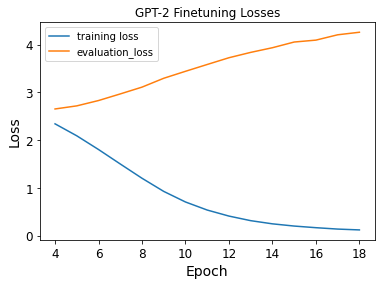

In [15]:
plt.figure()
plt.plot(list(train_losses.keys())[3:], list(train_losses.values())[3:], label="training loss")
plt.plot(list(eval_losses.keys())[3:], list(eval_losses.values())[3:],label="evaluation_loss")
plt.title("GPT-2 Finetuning Losses")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
